In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


from scipy.stats import spearmanr

In [3]:
%matplotlib notebook

# Plot Playground

This notebook is exploratory in nature and designed to look at various correlations in the early light curve data from the ZTF 2018 sample. 

In [11]:
info_path="../../forced_lightcurves/sample_lc_v2/"
salt_df = pd.read_csv(info_path + "../../Nobs_cut_salt2_spec_subtype.csv")
res = pd.read_csv('results_40percent.csv')

The useful columns from this database for plotting purposes: 

    name –– ZTF name of the SN
    z_adopt –– redshift of the SN
    z_source –– where the redshift was identified
    x1_salt2 –– SALT shape parameter
    c_salt2 –– SALT color parameter
    dm15B_rest –– Delta M15 measured in the B band, in the SN rest frame
    Ia subtype –– the SN subtype
    B_abs0_SALT2corr –– B-band absolute mag
    t0 –– time of first light
    t_rise –– rise time of the SN
    alpha_g –– rising index in the g-band
    alpha_r –– rising index in the r-band

In [9]:
salt_df['Ia subtype'].unique()

array(['normal', 'normal*', '99aa-like', 'SC*', '91T-like*', 'Ia-CSM',
       '02cx-like', '86G-like', 'SC', '99aa-like*', '91T-like'],
      dtype=object)

In [62]:
normal = np.where((salt_df['Ia subtype'] != 'Ia-CSM') & 
                  (salt_df['Ia subtype'] != 'SC') & 
                  (salt_df['Ia subtype'] != 'SC*') & 
                  (salt_df['Ia subtype'] != '86G-like') & 
                  (salt_df['Ia subtype'] != '02cx-like'))
good = np.where(res.final_selection.values == 1)
has_host_z = np.where(salt_df.z_source != 'Msl')

normal_good = np.intersect1d(normal, good)
normal_good_host = np.intersect1d(normal_good, has_host_z)



## Plots

In [63]:
t_rise = res['t_rise_50'].values
t_rise_unc = np.vstack((res['t_rise_50'] - res['t_rise_05'],
                    res['t_rise_95'] - res['t_rise_50'])) 
alpha_g = res['alpha_g'].values
alpha_g_unc = np.vstack((res['alpha_g'] - res['alpha_g_05'],
                         res['alpha_g_95'] - res['alpha_g']))
alpha_r = res['alpha_r'].values
alpha_r_unc = np.vstack((res['alpha_r'] - res['alpha_r_05'],
                         res['alpha_r_95'] - res['alpha_r']))

<IPython.core.display.Javascript object>


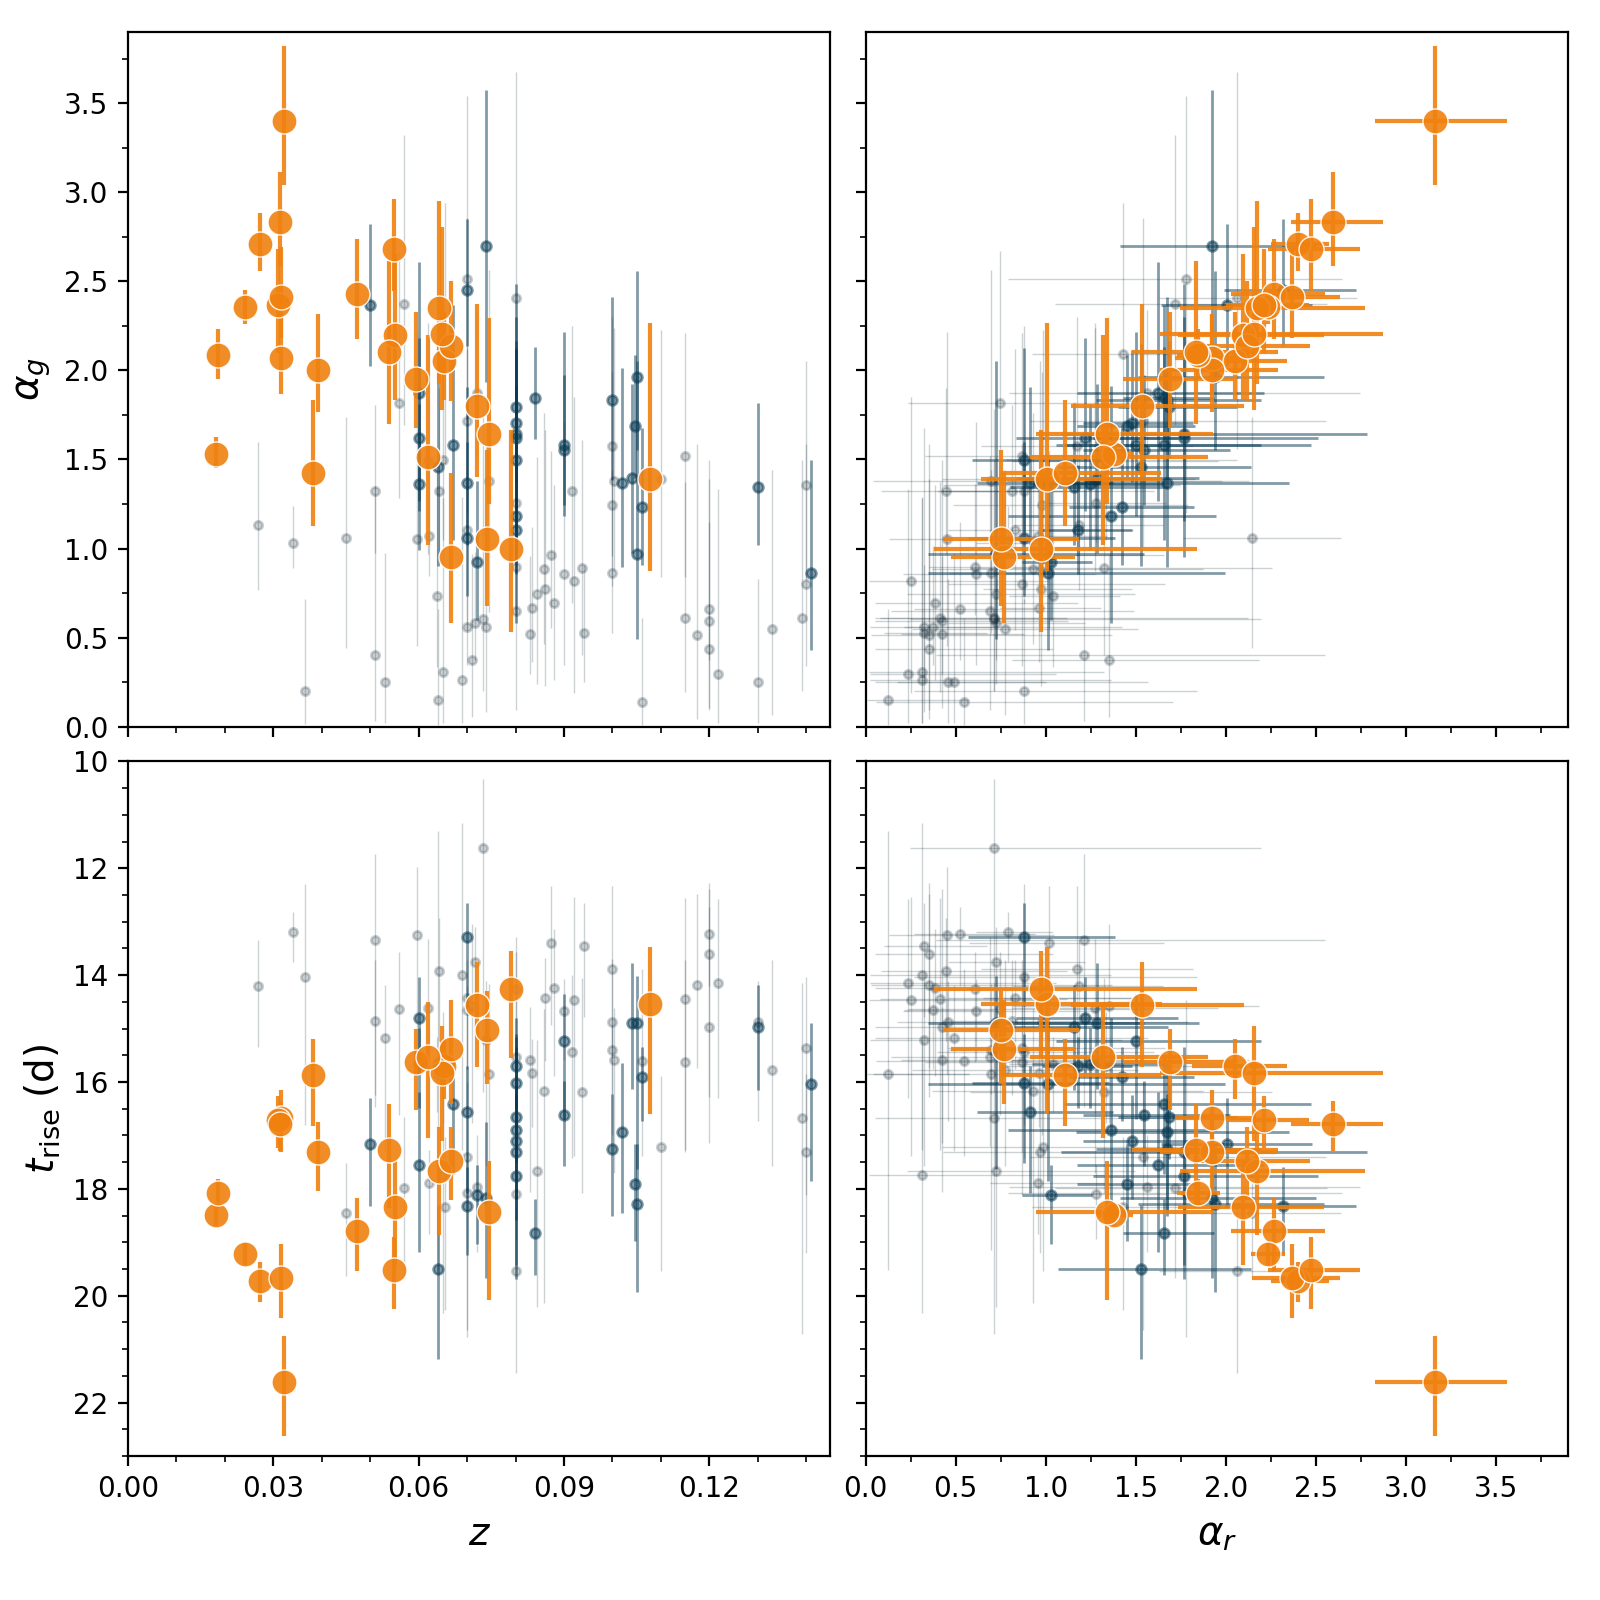

In [79]:
# rearange for plotting
normal_plot = np.setdiff1d(normal[0], normal_good)
normal_good_plot = np.setdiff1d(normal_good, normal_good_host)

color_dict = {'orange': '#F0810F',
              'blueberry': '#063852',
              'dark navy': '#011A27'}

fig, axes = plt.subplots(2,2, figsize=(8,8))
#  alpha_g vs. redshift
axes[0,0].errorbar(salt_df.z_adopt.values[normal_plot], alpha_g[normal_plot], 
             yerr=alpha_g_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
axes[0,0].errorbar(salt_df.z_adopt.values[normal_good_plot], alpha_g[normal_good_plot], 
             yerr=alpha_g_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
axes[0,0].errorbar(salt_df.z_adopt.values[normal_good_host], alpha_g[normal_good_host], 
             yerr=alpha_g_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

#  rise vs. redshift
axes[1,0].errorbar(salt_df.z_adopt.values[normal_plot], t_rise[normal_plot], 
             yerr=t_rise_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
axes[1,0].errorbar(salt_df.z_adopt.values[normal_good_plot], t_rise[normal_good_plot], 
             yerr=t_rise_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
axes[1,0].errorbar(salt_df.z_adopt.values[normal_good_host], t_rise[normal_good_host], 
             yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

#  alpha_g vs. alpha_r
axes[0,1].errorbar(alpha_r[normal_plot], alpha_g[normal_plot], 
                   xerr=alpha_r_unc[:,normal_plot], 
                   yerr=alpha_g_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
axes[0,1].errorbar(alpha_r[normal_good_plot], alpha_g[normal_good_plot], 
                   xerr=alpha_r_unc[:,normal_good_plot], 
             yerr=alpha_g_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
axes[0,1].errorbar(alpha_r[normal_good_host], alpha_g[normal_good_host], 
                   xerr=alpha_r_unc[:,normal_good_host], 
             yerr=alpha_g_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

#  t_rise vs. alpha_r
axes[1,1].errorbar(alpha_r[normal_plot], t_rise[normal_plot], 
                   xerr=alpha_r_unc[:,normal_plot], 
                   yerr=t_rise_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
axes[1,1].errorbar(alpha_r[normal_good_plot], t_rise[normal_good_plot], 
                   xerr=alpha_r_unc[:,normal_good_plot], 
                   yerr=t_rise_unc[:,normal_good_plot], fmt='.',
                   color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
axes[1,1].errorbar(alpha_r[normal_good_host], t_rise[normal_good_host], 
                   xerr=alpha_r_unc[:,normal_good_host], 
                   yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
                   color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

for ax in axes[0,:]:
    ax.set_ylabel(r'$\alpha_g$', fontsize=14)
    ax.set_ylim(0,3.9)
    ax.yaxis.set_minor_locator(MultipleLocator(0.25))
    ax.yaxis.set_major_locator(MultipleLocator(0.5))

for ax in axes[1,:]:
    ax.set_ylabel(r'$t_\mathrm{rise}\;(\mathrm{d})$', fontsize=14)
    ax.set_ylim(23,10)
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_major_locator(MultipleLocator(2))

for ax in axes[:,0]:
    ax.set_xlabel(r'$z$', fontsize=14)
    ax.set_xlim(0,0.145)
    ax.xaxis.set_minor_locator(MultipleLocator(0.01))
    ax.xaxis.set_major_locator(MultipleLocator(0.03))

for ax in axes[:,1]:
    ax.set_xlabel(r'$\alpha_r$', fontsize=14)
    ax.set_xlim(0,3.9)
    ax.xaxis.set_minor_locator(MultipleLocator(0.25))
    ax.xaxis.set_major_locator(MultipleLocator(0.5))

for ax in axes[0,:]:
    ax.set_xticklabels([])
    ax.set_xlabel('')

for ax in axes[:,1]:
    ax.set_yticklabels([])
    ax.set_ylabel('')

# for ax in axes.flatten():
#     ax.tick_params(top=True,right=True,which='both', labelsize=11)
    
fig.subplots_adjust(top=0.98,right=0.98,left=0.08,bottom=0.09,hspace=0.05, wspace=0.05)
fig.savefig('param_correlations.pdf')

## $X_1$ vs. rise time

<IPython.core.display.Javascript object>


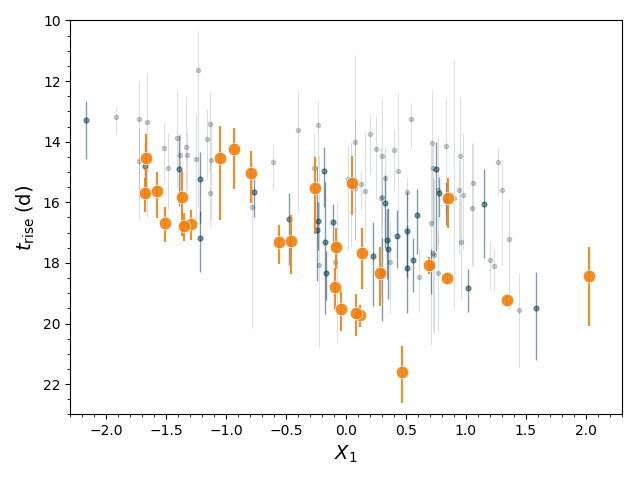

In [84]:
fig, ax = plt.subplots()

#  rise vs. redshift
ax.errorbar(salt_df.x1_salt2.values[normal_plot], t_rise[normal_plot], 
             yerr=t_rise_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
ax.errorbar(salt_df.x1_salt2.values[normal_good_plot], t_rise[normal_good_plot], 
             yerr=t_rise_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
ax.errorbar(salt_df.x1_salt2.values[normal_good_host], t_rise[normal_good_host], 
             yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

ax.set_ylabel(r'$t_\mathrm{rise}\;(\mathrm{d})$', fontsize=14)
ax.set_ylim(23,10)
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(2))

ax.set_xlabel(r'$X_1$', fontsize=14)
ax.set_xlim(-2.3,2.3)
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

fig.tight_layout()

In [80]:
salt_df.columns

Index(['name', 'z_Marshall', 'z_NED', 'ra_recenter', 'dec_recenter',
       't0_SALT_adam_jd', 'E_B_V_SandF', 'z_Caltech', 'z_adopt', 'z_source',
       'z_adopt_unc', 't0_B_salt2', 't0_g_salt2', 't0_r_salt2', 'x0_salt2',
       'x1_salt2', 'c_salt2', 'fratio_gmax_2adam', 'fratio_rmax_2adam',
       't0_salt2_unc', 'x0_salt2_unc', 'x1_salt2_unc', 'c_salt2_unc',
       'chisq_salt2', 'ndof_salt2', 'n10d_20d', 'B_app0', 'B_app0_unc',
       'g_app0', 'g_app0_unc', 'r_app0', 'r_app0_unc', 'dm15B', 'dm15B_unc',
       'dm15g', 'dm15g_unc', 'dm15r', 'dm15r_unc', 'dm15B_rest',
       'dm15B_rest_unc', 'dm15g_rest', 'dm15g_rest_unc', 'dm15r_rest',
       'dm15r_rest_unc', 't0_poly_g', 't0_poly_g_unc', 't0_poly_r',
       't0_poly_r_unc', 'dm15g_poly', 'dm15g_poly_unc', 'g_app_poly',
       'g_app_poly_unc', 'r_app_poly', 'r_app_poly_unc', 'dm15r_poly',
       'dm15r_poly_unc', 'dm15g_rest_poly', 'dm15g_rest_poly_unc',
       'dm15r_rest_poly', 'dm15r_rest_poly_unc', 'dm15g_adopted',
       'd

## $M_B$ vs. rise time

<IPython.core.display.Javascript object>


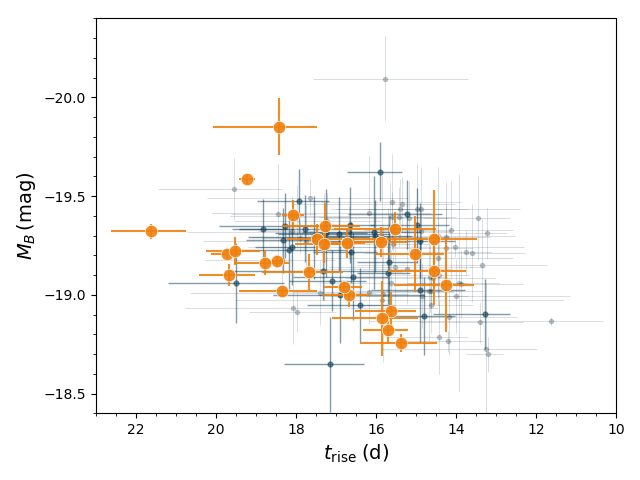

In [89]:
fig, ax = plt.subplots()

#  rise vs. redshift
ax.errorbar(t_rise[normal_plot], salt_df.B_abs0_SALT2corr.values[normal_plot],
            xerr=t_rise_unc[:,normal_plot], 
            yerr=salt_df.B_abs0_unc_SALT2corr.values[normal_plot],
            fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
ax.errorbar(t_rise[normal_good_plot], salt_df.B_abs0_SALT2corr.values[normal_good_plot],
            xerr=t_rise_unc[:,normal_good_plot], 
            yerr=salt_df.B_abs0_unc_SALT2corr.values[normal_good_plot],
            fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
ax.errorbar(t_rise[normal_good_host], salt_df.B_abs0_SALT2corr.values[normal_good_host],
            xerr=t_rise_unc[:,normal_good_host], 
            yerr=salt_df.B_abs0_unc_SALT2corr.values[normal_good_host],
            fmt='o', ms=9,
            color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

ax.set_xlabel(r'$t_\mathrm{rise}\;(\mathrm{d})$', fontsize=14)
ax.set_xlim(23,10)
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(2))

ax.set_ylabel(r'$M_B \,(\mathrm{mag})$', fontsize=14)
ax.set_ylim(-18.4,-20.4)
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.5))

fig.tight_layout()

### Panel plots to highlight redshift

<IPython.core.display.Javascript object>


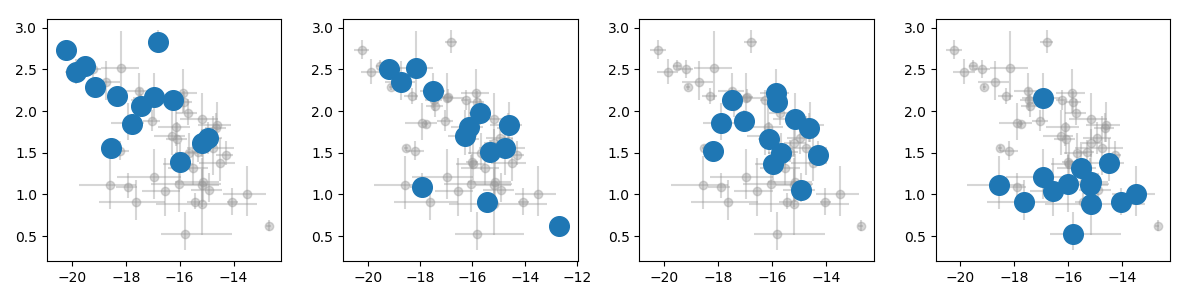

In [162]:
fig, axes = plt.subplots(1,4, figsize=(12,3))

idx_arr = norm_conv_spec
z_min_arr = [0, 0.048, 0.064, 0.078]
z_max_arr = [0.048, 0.064, 0.078, 0.2]
for ax, z_min, z_max in zip(axes, z_min_arr, z_max_arr):
    ax.errorbar(t0[idx_arr], alpha_g[idx_arr], yerr=alpha_g_unc[:,idx_arr], xerr=t0_unc[:,idx_arr], 
            fmt='o', color='0.6', ecolor='0.6', alpha=0.4)
    z_arr = np.intersect1d(idx_arr, np.where((z_min <= data_df.z_adopt.values) & (data_df.z_adopt.values < z_max))[0])
    ax.scatter(t0[z_arr], alpha_g[z_arr], zorder=10, s=200)
fig.tight_layout()

<IPython.core.display.Javascript object>


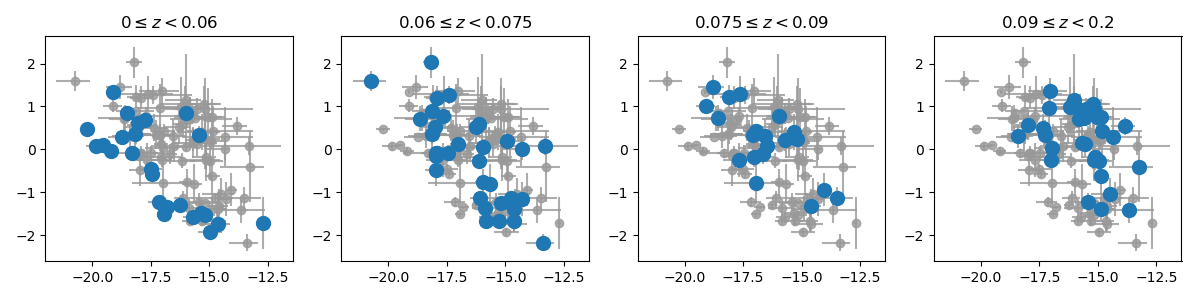

In [160]:
fig, axes = plt.subplots(1,4, figsize=(12,3))

idx_arr = np.intersect1d(all_norm, conv[0])
z_min_arr = [0, 0.06, 0.075, 0.09]
z_max_arr = [0.06, 0.075, 0.09, 0.2]
for ax, z_min, z_max in zip(axes, z_min_arr, z_max_arr):
    ax.errorbar(t0[idx_arr], data_df.x1_salt2.iloc[idx_arr], yerr=data_df.x1_salt2_unc.iloc[idx_arr], 
                xerr=t0_unc[:,idx_arr], fmt='o', color='0.6', ecolor='0.6', alpha=0.8)
    z_arr = np.intersect1d(idx_arr, np.where((z_min <= data_df.z_adopt.values) & (data_df.z_adopt.values < z_max))[0])
    ax.scatter(t0[z_arr], data_df.x1_salt2.iloc[z_arr], zorder=10,s=100)
    ax.set_title(r'${} \leq z < {}$'.format(z_min, z_max))
fig.tight_layout()

In [154]:
np.percentile(data_df.z_adopt.iloc[np.intersect1d(all_norm, conv[0])].values, (25,50,75))

array([0.06139875, 0.074     , 0.09252025])